# Specific Goals for EDA2:

1. Verify if Elon Musk Top Tweets really have impact on market.
2. If so, what duration of impact (price change) does it have? Indicated by reversal of behaviour.
    - 'Open Today' -> 'Close Today'
    - 'Open Today' -> 'Open Tomorrow'
    - 1 day? 2 days? 3 days?
3. Which metric should we be using?
    - Open vs Close on the same day?
    - High vs Low on the same day?
    - Mean Change? % Change?
    - Std Dev?

---------
NASDAQ Stock Market Trading Session (Eastern Time)  
Open: 9.30am  
Close: 8.00pm

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [51]:
tsla = pd.read_csv("../../data/stock_price/TSLA.csv")
elon = pd.read_csv("../../data/twitter/elon_clean.csv")

In [52]:
# set date as pandas datetime

tsla["Date"] = pd.to_datetime(tsla["Date"])
elon["date"] = pd.to_datetime(elon["date"])


## Transforming TSLA Open and Close into 1 price column

In [102]:
tsla_open = tsla[['Date', 'Open']]
tsla_close = tsla[['Date','Close']]

# offset datetime by respective hours
tsla_open['Date'] = tsla_open['Date'] + pd.DateOffset(hours=9.5)
tsla_close['Date'] = tsla_close['Date'] + pd.DateOffset(hours=20)

tsla_open = tsla_open.rename(columns={'Open':'Price'})
tsla_close = tsla_close.rename(columns={'Close':'Price'})

# append into single price df
tsla_price = tsla_open.append(tsla_close)
tsla_price = tsla_price.sort_values(by=['Date'])
tsla_price = tsla_price.reset_index(drop=True)


## Time shift Musk's Tweets from UTC to EST (-5 hours)

In [54]:
elon['date'] = elon['date'] + pd.DateOffset(hours=-5)


## Preparing datasets as in EDA1

In [59]:
elon_tesla = elon[elon["text"].str.contains("Tesla")]
elon_tesla_top = elon_tesla[(elon_tesla["retweets"]>9000) | (elon_tesla["favorites"]>58000)]
elon_tesla_top = elon_tesla_top.drop(columns=['username', 'mentions', 'hashtags', 'permalink'])


# Plotting Effect of Tweet on Stock Price +/- 7 days

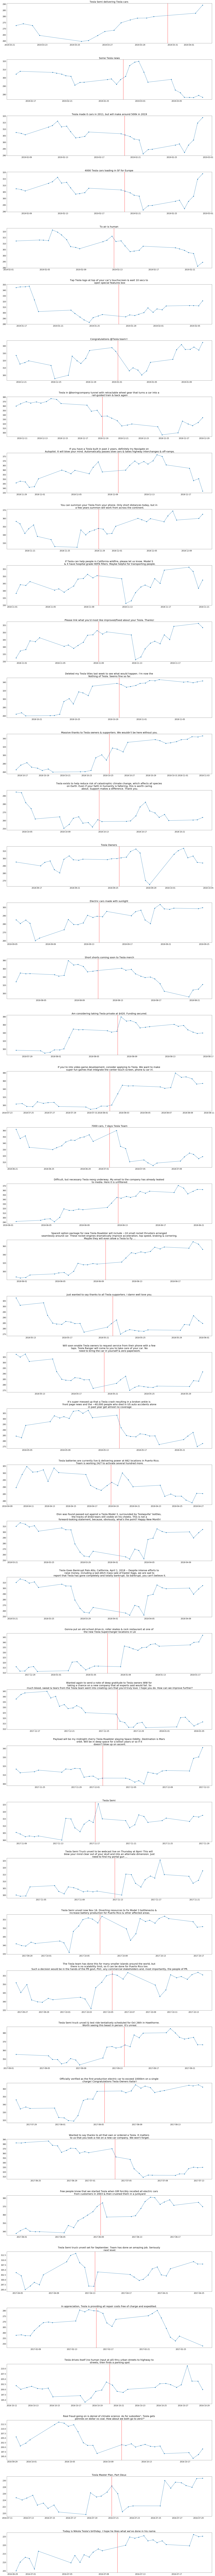

In [115]:
fig, ax = plt.subplots(nrows=elon_tesla_top.shape[0], ncols=1, figsize=(25,300))
plot_idx = 0

for i, row in elon_tesla_top.iterrows():
    
    datetime = row["date"]
    text = row["text"]
    
    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]
    
    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)
    
    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla_price.index[tsla_price['Date']>datetime][0]
    
    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 14
    end_idx = next_idx + 14
    
    sub_tsla = tsla_price.iloc[start_idx: end_idx]
    
    # plot
    x = sub_tsla["Date"]
    y = sub_tsla["Price"]
    
    ax[plot_idx].plot(x, y, marker='o')
    ax[plot_idx].set_title(text, fontsize=20)
#     ax[plot_idx].set_xlim((start_date, end_date))
#     ax[plot_idx].set_ylim((y_min, y_max))

    ax[plot_idx].axvline(x=datetime, color='red')
    ax[plot_idx].tick_params('both', labelsize=15)
    
    plot_idx += 1


plt.tight_layout(pad=0.4, h_pad=5.0)
plt.show()

# Plotting Effect of Tweet on Intra-day Change

In [117]:
tsla_intraday = tsla.copy()

tsla_intraday["Change"] = tsla_intraday["Close"]-tsla_intraday["Open"]
tsla_intraday["%Change"] = tsla_intraday["Change"]/tsla_intraday["Open"]*100

tsla_intraday["Range"] = tsla_intraday["High"]-tsla_intraday["Low"]
tsla_intraday["%Range"] = tsla_intraday["Range"]/tsla_intraday["Open"]

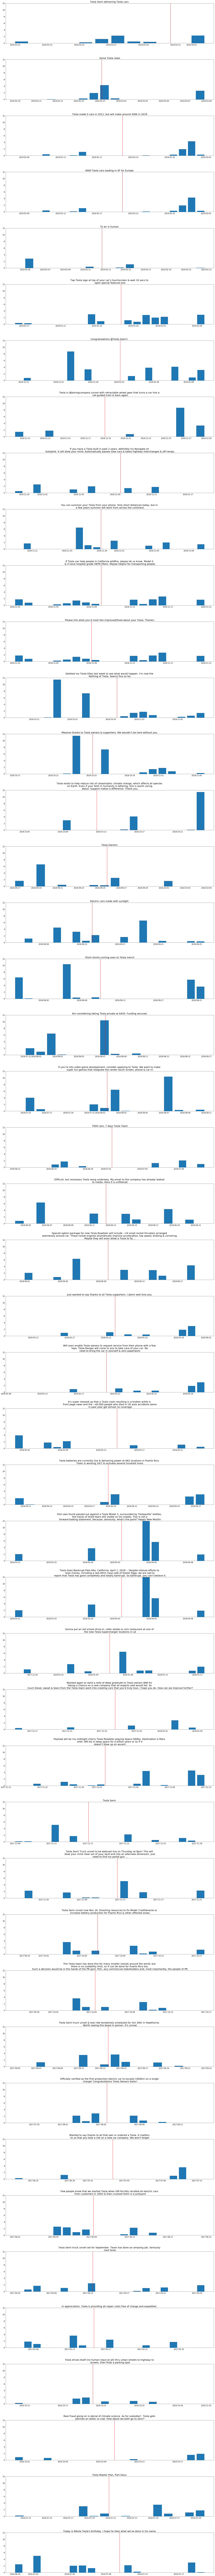

In [131]:
fig, ax = plt.subplots(nrows=elon_tesla_top.shape[0], ncols=1, figsize=(25,300))
plot_idx = 0

for i, row in elon_tesla_top.iterrows():
    
    datetime = row["date"]
    text = row["text"]
    
    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]
    
    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)
    
    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla_intraday.index[tsla_intraday['Date']>datetime][0]
    
    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 7
    end_idx = next_idx + 7
    
    sub_df = tsla_intraday.iloc[start_idx: end_idx]
    
    # plot
    x = sub_df["Date"]
    y = sub_df["%Change"]
    
    ax[plot_idx].bar(x, y, align='edge')
    ax[plot_idx].set_title(text, fontsize=20)
#     ax[plot_idx].set_xlim((start_date, end_date))
    ax[plot_idx].set_ylim((0, 12))

    ax[plot_idx].axvline(x=datetime, color='red')
    ax[plot_idx].tick_params('both', labelsize=15)
    
    plot_idx += 1

plt.tight_layout(pad=0.4, h_pad=5.0)
plt.show()

In [125]:
fig, ax = plt.subplots()

# Plotting Effect of Tweet on Intra-day Range

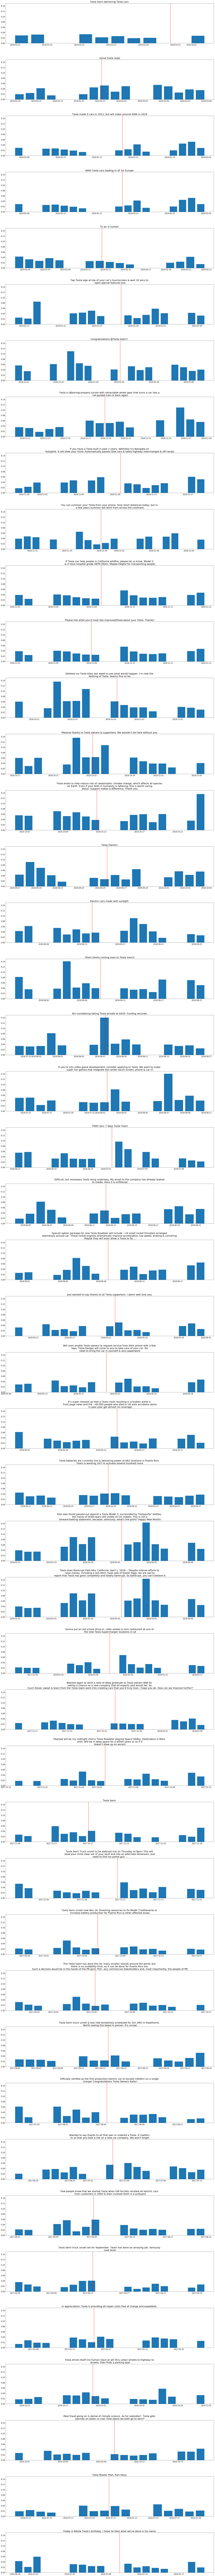

In [130]:
fig, ax = plt.subplots(nrows=elon_tesla_top.shape[0], ncols=1, figsize=(25,300))
plot_idx = 0

for i, row in elon_tesla_top.iterrows():
    
    datetime = row["date"]
    text = row["text"]
    
    # remove https or http URLs
    text = text.split("https://")[0]
    text = text.split("http://")[0]
    text = text.split("pic.twitter")[0]
    
    # split text into 2 or 3 rows if too long
    if len(text.split())>30:
        text = text.split()
        text.insert(14, "\n")
        text.insert(29, "\n")
        text = ' '.join(text)
    elif len(text.split())>15:
        text = text.split()
        text.insert(14, "\n")
        text = ' '.join(text)
    
    # get idx of tsla stock base on datetime of tweet
    next_idx = tsla_intraday.index[tsla_intraday['Date']>datetime][0]
    
    # get +/- 7 day range of tesla stock price
    start_idx = next_idx - 7
    end_idx = next_idx + 7
    
    sub_df = tsla_intraday.iloc[start_idx: end_idx]
    
    # plot
    x = sub_df["Date"]
    y = sub_df["%Range"]
    
    ax[plot_idx].bar(x, y, align='edge')
    ax[plot_idx].set_title(text, fontsize=20)
#     ax[plot_idx].set_xlim((start_date, end_date))
    ax[plot_idx].set_ylim((0, 0.15))

    ax[plot_idx].axvline(x=datetime, color='red')
    ax[plot_idx].tick_params('both', labelsize=15)
    
    plot_idx += 1

plt.tight_layout(pad=0.4, h_pad=5.0)
plt.show()